# tellurium: change constant and boundaryCondition
An often occuring simulation scenario is setting a non-boundary species to a constant value throughout the simulation. This requires to modify the SBML model with `libsbml`.

The following example shows hot to set species constant with tellurium and libsbml.

The model converts `A -> B` with `A` being consumed in the model.

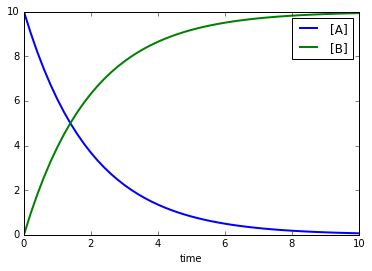

In [1]:
from __future__ import print_function, division
import tellurium as te

%matplotlib inline

# A is converted to B and consumed in the process
m1 = """
model m1()
    R1: A -> B; k1*A;
    k1 = 0.5; 
    A=10.0; B=0.0;
end
"""
r1 = te.loada(m1)
r1.simulate(start=0, end=10, steps=50)
r1.plot()

sbml_m1 = r1.getSBML()
# print(sbml_m1)

Now we test the model behavior under constant A by modifying the SBML. To achieve this the species must be set as a `boundaryCondition=true`.

The `timeCourseSelection` has to be updated to include not only the variable species, but also the boundary species.

Under constant `A` the product `B` accumulates to infinity.

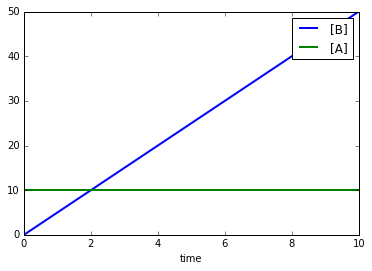

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

In [2]:
import libsbml
# get document and model
doc = libsbml.readSBMLFromString(sbml_m1)
model = doc.getModel()

# update model id
model.setId('m2')

# change boundaryCondition attribute
A = model.getSpecies("A")
A.setBoundaryCondition(True)

sbml_m2 = libsbml.writeSBMLToString(doc)
# print(sbml_m2)

# load the new model & simulate
r2 = te.loads(sbml_m2)
r2.timeCourseSelections = r2.timeCourseSelections + ['[{}]'.format(sid) for sid in r2.getBoundarySpeciesIds()]
r2.simulate(start=0, end=10, steps=50)
r2.plot()